In [21]:
import numpy as np
import pandas as pd
import tempfile
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statistics import variance 
import umap


def read_file(path):
    try:
        df = pd.read_csv(path)
    except:
        df = pd.read_csv(path, encoding='cp1251')
    return df


def normalization(data):
    return ((data - data.mean())/data.std())


def cleaning(data_):
    data = data_
    column_name = data.columns
    i = 0
    for column in column_name:
        if i == 0:
            df_filtered = data.loc[(data[column] >= (data[column].mean() - 3 * data[column].std())) &
                               (data[column] <= (data[column].mean() + 3 * data[column].std()))]
            i+=1
        else:
            df_filtered = df_filtered.loc[(df_filtered[column] >= (df_filtered[column].mean() - 3 * df_filtered[column].std()))
                                        & (df_filtered[column] <= (df_filtered[column].mean() + 3 * df_filtered[column].std()))]
    df_filtered = df_filtered.reset_index(drop = 'True')
    return df_filtered


def data_preparation(data):
    data_not_nan = data.dropna().reset_index(drop=True)
    data_ = cleaning(data_not_nan)
    column_name = data_.columns
    for column in column_name:
        if (column != 'X') & (column != 'Y'):
            normalization(data_[column])
    return data_


def gistograms(data):
    size = len(data.columns)
    column_name = data.columns
    fig, axs = plt.subplots(size - 2, figsize=(10, 70))
    i = 0
    for column in column_name:
        if (column != 'X') & (column !='Y'):
            axs[i].hist(data[column], bins=30)
            axs[i].set_title(column)
            i+=1
    plt.show()
    

def cards(data, marker_size=0.5, limit=1):
    X = data['X']
    Y = data['Y']
    column_name = data.columns
    fig, axs = plt.subplots(len(data.columns)-2, figsize=(10, 80))
    i = 0
    for column in column_name:
        if (column != 'X') & (column != 'Y'):
            im = axs[i].scatter(X, Y, c = data[column], s = marker_size, cmap = 'turbo', vmin = data[column].min()/limit, vmax = data[column].max()/limit)
            axs[i].set_title(column)
            axs[i].set_xlabel('X')
            axs[i].set_ylabel('Y')
            plt.colorbar(im, ax=axs[i])
            i+=1
    plt.show()

    
def cor_matrix(data):
    f, ax = plt.subplots(dpi = 150)
    corr = data.corr()
    sns.heatmap(np.abs(corr),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=0.0, vmax=1.0,
            square=True, ax=ax)
    plt.show()

    
def del_cors(data, cor_size):
    data_del = data.copy()
    corr_matrix = data_del.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > cor_size)] 
    data_del.drop(to_drop, axis = 1, inplace = True)
    return data_del


def prepare_classters(data):
    data_ = data.drop(columns = ['X', 'Y'], axis = 1)
    return data_


def clasters(data, klasster_size):
    kmeans = KMeans(n_clusters = klasster_size)
    kmeans.fit(data)
    return kmeans 



def pca(data, size_components):
    pca = PCA(n_components = size_components)
    pca_data = pca.fit_transform(data)
    return pca_data


def classter_labels(data, classter):
    fig = plt.figure(figsize=(10, 7))
    X = data['X']
    Y = data['Y']
    plt.scatter(X, Y, c = classter.labels_, s = 0.5, cmap = 'turbo')
    plt.title('класстер({classter_size})'.format(classter_size = np.bincount(classter.labels_).size))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    

def pca_classter_labels(data, pca_data, classter):
    fig = plt.figure(figsize=(10, 7))
    X = data['X']
    Y = data['Y']
    num_rows, num_cols = pca_data.shape
    plt.scatter(X, Y, c = classter.labels_, s = 0.5, cmap = 'turbo')
    plt.title('pca({pca_size}) classter({classter_size})'.format(pca_size = num_cols, classter_size = np.bincount(classter.labels_).size))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()
    
    
def umap_classter_labels(data, umap_data, classter):
    fig = plt.figure(figsize=(10, 7))
    X = data['X']
    Y = data['Y']
    num_rows, num_cols = umap_data.shape
    plt.scatter(X, Y, c = classter.labels_, s = 0.5, cmap = 'turbo')
    plt.title('umap({pca_size}) classter({classter_size})'.format(pca_size = num_cols, classter_size = np.bincount(classter.labels_).size))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()


def umap_classter(data, size):
    reducer = umap.UMAP(size)
    embedding = reducer.fit_transform(data)
    return embedding


def chip(data):
    fig = plt.figure(dpi = 150)
    plt.scatter(data[:, 0], data[:, 1], s = 0.05, cmap = 'turbo')
    plt.colorbar()



In [19]:
path = 'unnamed_attrs.csv'
df = read_file(path)

C:\Users\5B34~1\AppData\Local\Temp/ipykernel_106948/2702605617.py:2: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  df = read_file(path)


In [20]:
df.rename(columns = {'Координата X,м' : 'X', 'Координата Y,м' : 'Y'}, inplace = True)
df.drop(['Фактическая дата по рапорту', 'Время по рапорту', 'Номер файла (FFID)', 'Перестрелы'], axis=1, inplace=True)

In [18]:
for a in df['Перестрелы']:
    if a=='1899-12-30 00:00:00':
        print(1)

df = df.astype({'Перестрелы': np.float})
df['Перестрелы']

1
1
1
1


C:\Users\5B34~1\AppData\Local\Temp/ipykernel_106948/1768192252.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.astype({'Перестрелы': np.float})


ValueError: could not convert string to float: '1899-12-30 00:00:00'

In [22]:
df_prepared = data_preparation(df)

In [23]:
df_prepared

,Номер профиля,Номер пикета,"Превышения Z, м",Количество накоплений,Кол-во виброустановок в группе,"COG, м",Доминантная частота,"медианная амплитуда микросейсм, мВ","медианная амплитуда сигнала, мВ",Соотношение Signal/Noise,X,Y
0,2605,5881,50.8,4,4.0,3.200242,15.96,1.700000,21.400000,12.588235,24800.91,28200.5
1,2605,5880,50.7,4,4.0,3.766696,15.83,1.700000,21.000000,12.352941,24750.91,28200.5
2,2605,5879,50.9,4,4.0,3.398761,15.86,1.700000,21.500000,12.647059,24701.00,28200.5
3,2605,5877,51.0,4,4.0,2.799558,15.81,1.900000,22.300000,11.736842,24600.82,28200.5
4,2605,5876,51.1,4,4.0,3.894956,15.85,1.800000,22.400000,12.444444,24550.91,28200.5
...,...,...,...,...,...,...,...,...,...,...,...,...
57484,2269,5507,38.6,6,4.0,4.236371,19.48,4.816461,42.139267,8.749010,6101.91,11400.5
57485,2269,5506,41.7,6,4.0,3.447373,18.98,4.760201,38.156528,8.015739,6050.82,11400.5
57486,2269,5505,44.5,6,4.0,2.804401,19.39,4.931137,39.836075,8.078477,6001.10,11401.0
57487,2265,5505,36.6,6,4.0,5.866747,20.16,4.322856,31.973854,7.396465,6001.22,11200.5


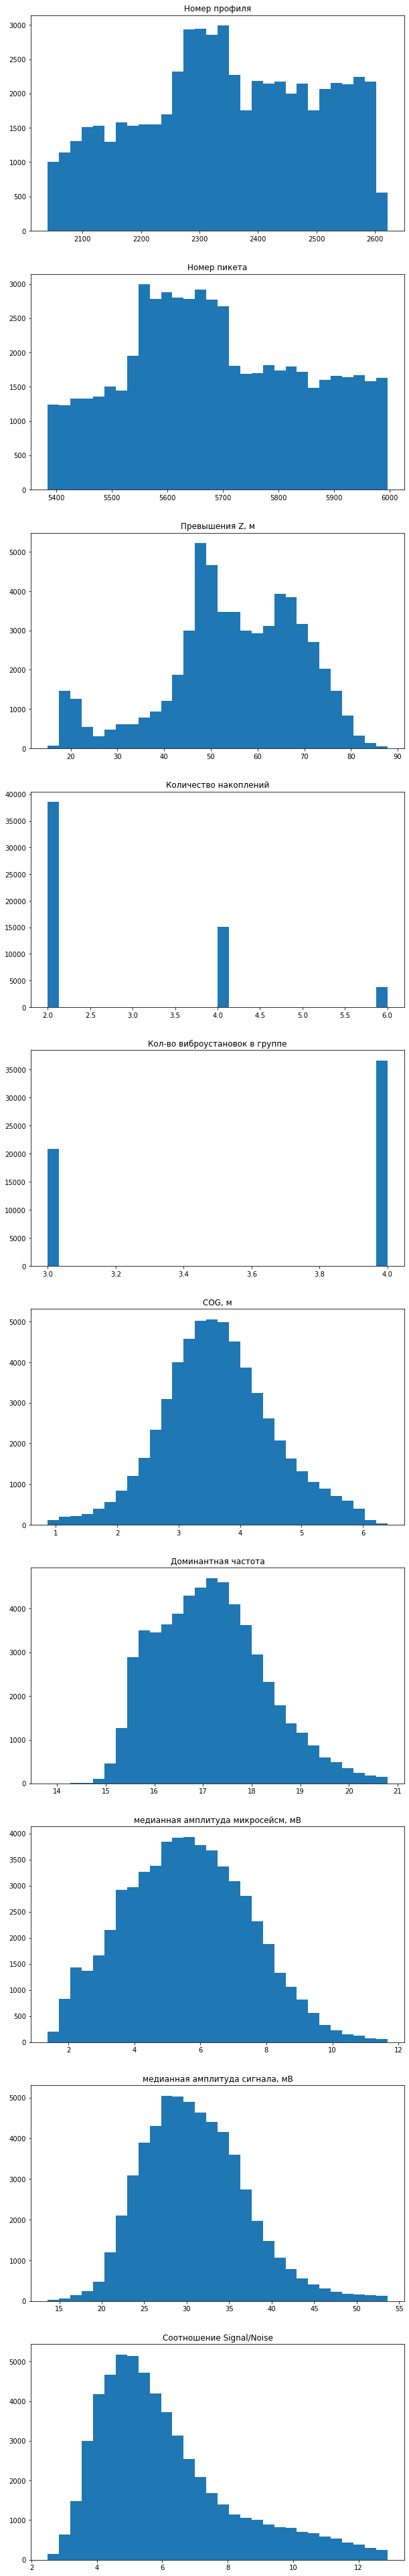

In [24]:
gistograms(df_prepared)

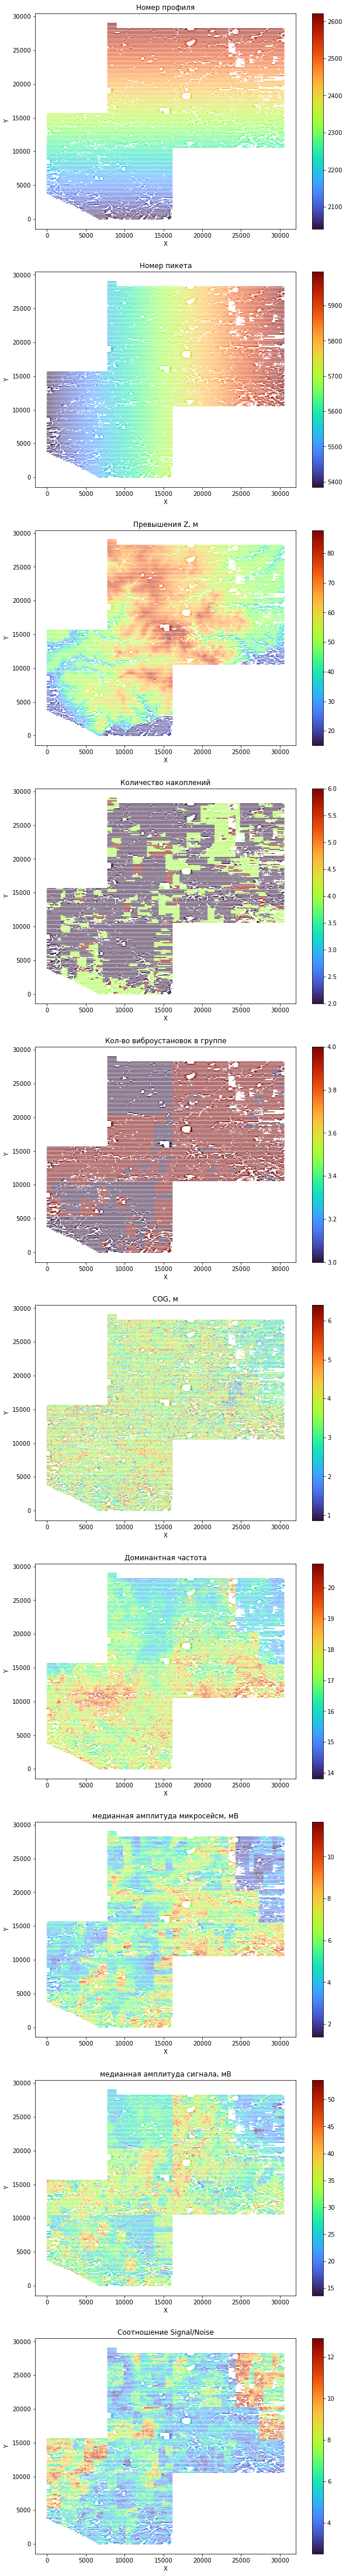

In [25]:
cards(df_prepared, 0.1, 1)

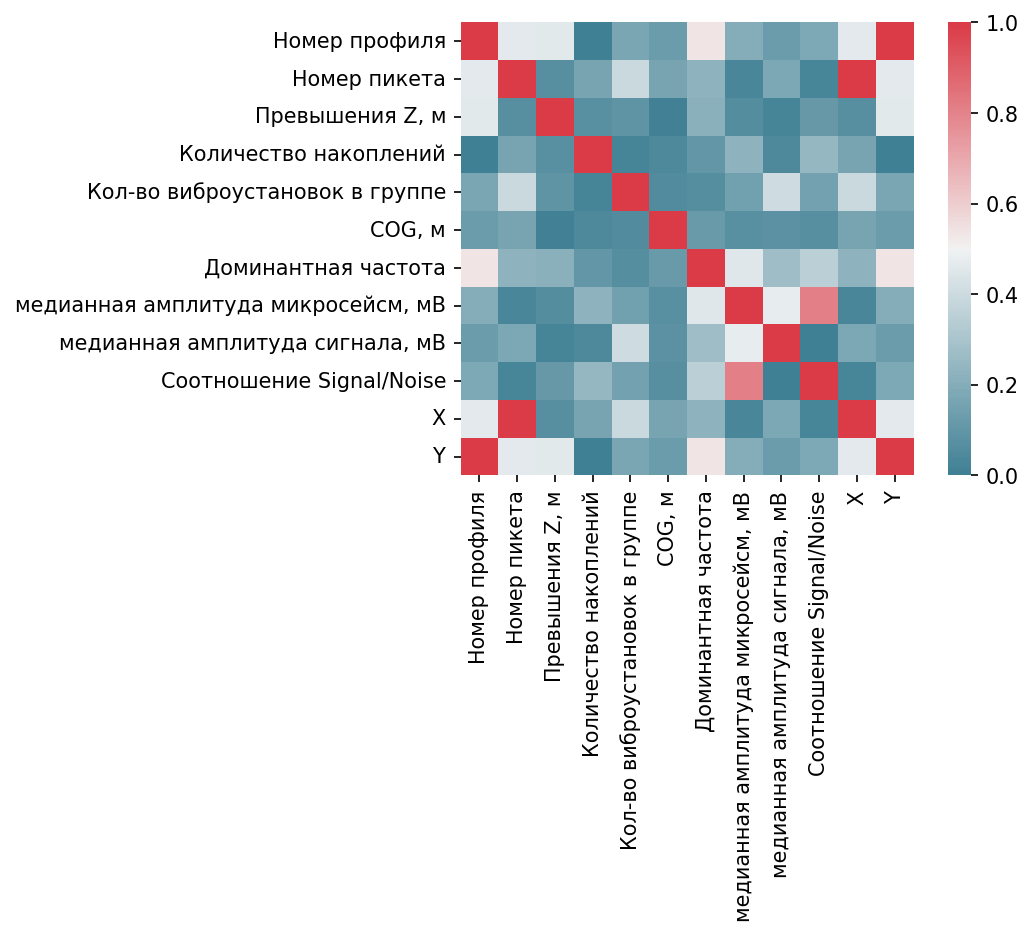

In [26]:
cor_matrix(df_prepared)

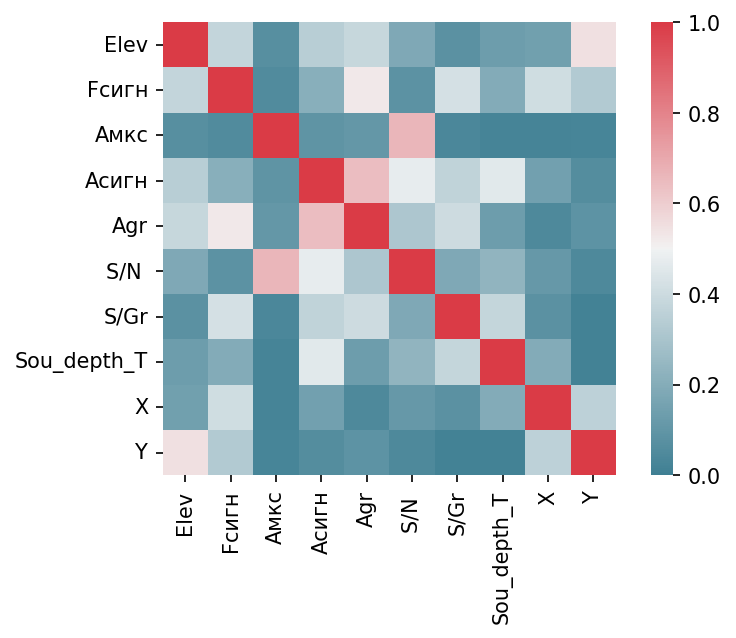

In [18]:
df_work = del_cors(df_prepared, 0.7)
cor_matrix(df_work)

In [15]:
df_work

,Elev,Fсигн,Амкс,Асигн,Аgr,S/N,S/Gr,Sou_depth_T,X,Y
0,113.1,26.5,5.8,453.3,1684.0,78.155172,0.269181,20.28,13500.1,9300.3
1,113.1,28.9,6.1,353.1,1363.0,57.885246,0.259061,21.48,13500.0,9350.3
2,114.0,23.5,4.5,234.5,1953.0,52.111111,0.120072,29.40,13200.1,9300.5
3,114.1,24.8,5.0,303.8,2273.0,60.760000,0.133656,25.32,13200.2,9350.6
4,113.8,24.7,6.6,297.9,2168.0,45.136364,0.137408,24.24,13200.1,9400.4
...,...,...,...,...,...,...,...,...,...,...
5314,125.5,35.9,31.0,471.0,1669.0,15.193548,0.282205,19.44,3599.9,850.6
5315,125.0,36.0,28.8,448.2,1653.0,15.562500,0.271143,21.00,3650.7,1300.2
5316,125.0,38.0,28.6,489.2,1658.0,17.104895,0.295054,21.12,3600.5,750.6
5317,125.0,37.3,29.8,449.5,1491.0,15.083893,0.301476,18.12,3600.0,700.3


In [10]:
df_for_clust = prepare_classters(df_work)
# cl_2 = clasters(df_work, 3)
pca_2 = pca(df_for_clust, 2)
# cl_pca_2 = clasters(pca_2, 3)
umap_2 = umap_classter(df_for_clust, 2)
# cl_umap_2 = clasters(umap_2, 3)
# pca_classter_labels(df_copy, pca_2, cl_pca_2)
# umap_classter_labels(df_copy, umap_2, cl_umap_2)
# classter_labels(df_copy, cl_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [ ]:
pca_2

In [ ]:
chip(pca_2)
chip(umap_2)